In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
%matplotlib inline

path='D:/Projects/Capstone/'
filename=path+'intervention_daily.csv'
data=pd.read_csv(filename,encoding='ISO-8859-1',na_filter=True)

In [2]:
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

In [3]:
ville=data['ville']
ville=ville.tolist()
ville=set(ville)
ville=list(ville)

In [4]:
dict_ville={}
for i in range(30):
    dict_ville[ville[i]]=i

In [5]:
ville_=data['ville'].values
index=dict_ville[ville_[0]]

In [6]:
district_code=np.zeros((30,len(data)))
ville_=data['ville'].values
for i in range(len(ville_)):
    index=dict_ville[ville_[i]]
    district_code[index][i]=1

In [7]:
day_code=np.zeros((31,len(data)))
day_=data['day'].values
for i in range(len(day_)):
    index=day_[i]-1
    day_code[index][i]=1

In [8]:
data.columns

Index(['ville', 'year', 'month', 'day', 'Avg_Temp', 'Avg_Dew_point',
       'Avg_Humidity', 'Sum_nombre_unites', 'Avg_area(km2)', 'Avg_density',
       'Avg_income-avg(2015)', 'Avg_income-median(2015)', 'Avg_population',
       'Sum_#int', 'weekday'],
      dtype='object')

In [9]:
data=data[['Avg_Temp', 'Avg_Dew_point','Avg_Humidity', 'Sum_nombre_unites', 'Avg_area(km2)', 'Avg_density','Avg_income-avg(2015)', 'Avg_income-median(2015)', 'Avg_population',
       'Sum_#int']]

In [10]:
name=['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v28','v29','v30']
for i in range(30):
    data[name[i]]=district_code[i]


In [11]:
name=['d1','d2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12','d13','d14','d15','d16','d17','d18','d19','d20','d21','d22','d23','d24','d25','d26','d27','d28','d29','d30','d31']
for i in range(31):
    data[name[i]]=day_code[i]

In [12]:
# data=data.drop(['weekday'], axis=1)
data.columns

Index(['Avg_Temp', 'Avg_Dew_point', 'Avg_Humidity', 'Sum_nombre_unites',
       'Avg_area(km2)', 'Avg_density', 'Avg_income-avg(2015)',
       'Avg_income-median(2015)', 'Avg_population', 'Sum_#int', 'v1', 'v2',
       'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13',
       'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23',
       'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'd1', 'd2', 'd3', 'd4',
       'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15',
       'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25',
       'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
      dtype='object')

In [13]:
columns=data.columns.tolist()
columns=columns[:3]+columns[4:9]+columns[10:]+[columns[3]]+[columns[9]]
columns

['Avg_Temp',
 'Avg_Dew_point',
 'Avg_Humidity',
 'Avg_area(km2)',
 'Avg_density',
 'Avg_income-avg(2015)',
 'Avg_income-median(2015)',
 'Avg_population',
 'v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24',
 'v25',
 'v26',
 'v27',
 'v28',
 'v29',
 'v30',
 'd1',
 'd2',
 'd3',
 'd4',
 'd5',
 'd6',
 'd7',
 'd8',
 'd9',
 'd10',
 'd11',
 'd12',
 'd13',
 'd14',
 'd15',
 'd16',
 'd17',
 'd18',
 'd19',
 'd20',
 'd21',
 'd22',
 'd23',
 'd24',
 'd25',
 'd26',
 'd27',
 'd28',
 'd29',
 'd30',
 'd31',
 'Sum_nombre_unites',
 'Sum_#int']

In [14]:
data=data[columns]

In [15]:
scores=[[]]

In [16]:
Y_values=  data[['Sum_nombre_unites',"Sum_#int"]].values
X_values = data[data.columns[:8]].values
X_values=scale(X_values)
X_values1 = data[data.columns[8:-2]].values                
X_values= np.concatenate((X_values, X_values1), axis=1)
                
X_train, X_test, y_train, y_test = train_test_split(X_values,Y_values,test_size=0.3,random_state=40)

In [17]:
# Train a model and predict the Number of units deployed for a special hour
Ic1=LinearRegression()
Ic1.fit(X_train,y_train[:,0])
a=Ic1.score(X_test,y_test[:,0])
units_hat=Ic1.predict(X_test)

# Train a model and predict the Number of interventions in a special hour
Ic2=LinearRegression()
Ic2.fit(X_train,y_train[:,1])
b=Ic2.score(X_test,y_test[:,1])

int_hat=Ic2.predict(X_test)

In [18]:
a

0.11109954429074052

In [19]:
b

0.78429467068352443

### Comparing the result of prediction and ture value

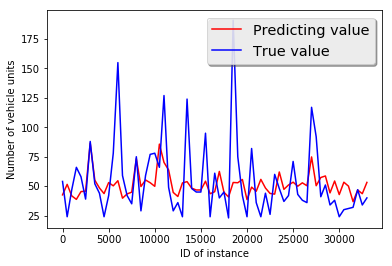

In [34]:
fig, ax = plt.subplots()
ax.plot(range(0,len(y_test),500),units_hat[range(0,len(y_test),500)],'r-', label='Predicting value')
ax.plot(range(0,len(y_test),500),y_test[:,0][range(0,len(y_test),500)],'b-', label='True value')

legend = ax.legend(shadow=True, fontsize='x-large')
plt.xlabel("ID of instance")
plt.ylabel("Number of vehicle units")


# plt.plot(range(0,len(y_test),1000),units_hat[range(0,len(y_test),1000)],'r-',range(0,len(y_test),1000),y_test[:,0][range(0,len(y_test),1000)],'b-')

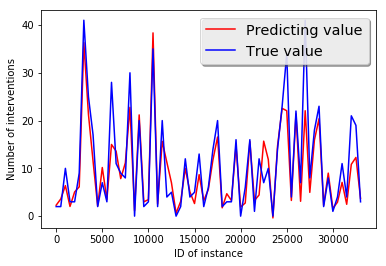

In [35]:
fig, ax = plt.subplots()
ax.plot(range(0,len(y_test),500),int_hat[range(0,len(y_test),500)],'r-', label='Predicting value')
ax.plot(range(0,len(y_test),500),y_test[:,1][range(0,len(y_test),500)],'b-', label='True value')

legend = ax.legend(shadow=True, fontsize='x-large')
plt.xlabel("ID of instance")
plt.ylabel("Number of interventions")

# plt.plot(range(0,len(y_test),1000),int_hat[range(0,len(y_test),1000)],'r-',range(0,len(y_test),1000),y_test[:,1][range(0,len(y_test),1000)],'b-')

### Neural Network

In [20]:
import tensorflow as tf
from tensorflow.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras import Sequential
from tensorflow.python.keras import optimizers


In [21]:
model=Sequential()
model.add(Dense(units=100, activation='tanh', input_dim=69))
model.add(Dense(units=150, activation='tanh'))
model.add(Dense(units=50, activation='tanh'))
model.add(Dense(units=2, activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               7000      
_________________________________________________________________
dense_2 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                7550      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total params: 29,802
Trainable params: 29,802
Non-trainable params: 0
_________________________________________________________________


In [22]:
X_train.shape

(77784, 69)

In [23]:
y_train.shape

(77784, 2)

In [24]:
model.fit(X_train, y_train,epochs=100,batch_size=100)

Epoch 1/100
77784/77784 [==============================] - 7s 91us/step - loss: 620.6490 - mean_squared_error: 620.6490
Epoch 2/100
77784/77784 [==============================] - 2s 26us/step - loss: 583.1165 - mean_squared_error: 583.1165
Epoch 3/100
77784/77784 [==============================] - 2s 25us/step - loss: 578.7696 - mean_squared_error: 578.7696
Epoch 4/100
77784/77784 [==============================] - 2s 27us/step - loss: 578.9572 - mean_squared_error: 578.9572
Epoch 5/100
77784/77784 [==============================] - 2s 24us/step - loss: 577.3175 - mean_squared_error: 577.3175
Epoch 6/100
77784/77784 [==============================] - 2s 23us/step - loss: 577.6545 - mean_squared_error: 577.6545
Epoch 7/100
77784/77784 [==============================] - 2s 25us/step - loss: 577.6582 - mean_squared_error: 577.6582
Epoch 8/100
77784/77784 [==============================] - 2s 24us/step - loss: 577.2181 - mean_squared_error: 577.2181
Epoch 9/100
77784/77784 [===============

In [25]:
y_hat=model.predict(X_test)

In [26]:
MSE(y_hat[0],y_test[0])

23.236379702994327

In [27]:
MSE(y_hat[1],y_test[1])

394.21008172116854

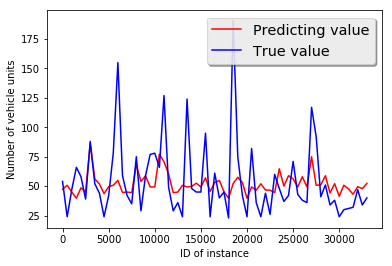

In [37]:
fig, ax = plt.subplots()
ax.plot(range(0,len(y_test),500),y_hat[:,0][range(0,len(y_test),500)],'r-', label='Predicting value')
ax.plot(range(0,len(y_test),500),y_test[:,0][range(0,len(y_test),500)],'b-', label='True value')

legend = ax.legend(shadow=True, fontsize='x-large')
plt.xlabel("ID of instance")
plt.ylabel("Number of vehicle units")

# plt.plot(range(0,len(y_test),10000),y_hat[:,0][range(0,len(y_test),10000)],'r-',range(0,len(y_test),10000),y_test[:,0][range(0,len(y_test),10000)],'b-')

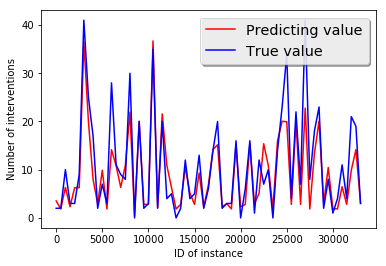

In [39]:
fig, ax = plt.subplots()
ax.plot(range(0,len(y_test),500),y_hat[:,1][range(0,len(y_test),500)],'r-', label='Predicting value')
ax.plot(range(0,len(y_test),500),y_test[:,1][range(0,len(y_test),500)],'b-', label='True value')
# plt.plot(range(0,len(y_test),10000),y_hat[:,0][range(0,len(y_test),10000)],'r-',range(0,len(y_test),10000),y_test[:,0][range(0,len(y_test),10000)],'b-')
legend = ax.legend(shadow=True, fontsize='x-large')
plt.xlabel("ID of instance")
plt.ylabel("Number of interventions")

# plt.plot(range(0,len(y_test),10000),y_hat[:,1][range(0,len(y_test),10000)],'r-',range(0,len(y_test),10000),y_test[:,1][range(0,len(y_test),10000)],'b-')